# INVESTIGATING THE PRODUCTIVITY OF A STEEL BELT BRAZER

 #### <P> Installing important libraries.  <P>

In [74]:
import pandas as pd
import psycopg2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split  # Import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


#### Redshift database credential

In [3]:
host = 'capstoneproject.654654462132.us-east-2.redshift-serverless.amazonaws.com'
port = '5439'
database = 'dev'
user = 'admin'
password = 'Superuser09'

#### Connecting to postgres sql (Redshift datawarehouse), using credential

In [12]:
connect = psycopg2.connect(
    dbname=database,
    user=user,
    password=password,
    host=host,
    port=port
)

In [5]:
sql_query1 = """
SELECT * FROM "dev"."steelbrazercapstone"."steelbrazerdata";
"""

In [6]:
sql_query2 = """
SELECT * FROM "dev"."steelbrazercapstone"."employeesheet";
"""

In [7]:
sql_query3 = """
SELECT * FROM "dev"."steelbrazercapstone"."qualitysheet";
"""

In [17]:
sql_query4 = """
SELECT * FROM "dev"."steelbrazercapstone"."scrapissuelist";
"""

In [8]:
sql_query5 = """
SELECT * FROM "dev"."steelbrazercapstone"."tempsheet" ;
"""

In [9]:
steelbrazerdata_df = pd.read_sql_query(sql_query1, connect)

C:\Users\lucas\AppData\Local\Temp\ipykernel_24184\3314322505.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  steelbrazerdata_df = pd.read_sql_query(sql_query1, connect)


In [13]:
employeesheet_df = pd.read_sql_query(sql_query2, connect)

C:\Users\lucas\AppData\Local\Temp\ipykernel_24184\1193597176.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  employeesheet_df = pd.read_sql_query(sql_query2, connect)


In [14]:
qualitysheet_df = pd.read_sql_query(sql_query3, connect)

C:\Users\lucas\AppData\Local\Temp\ipykernel_24184\1183759512.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  qualitysheet_df = pd.read_sql_query(sql_query3, connect)


In [18]:
scrapissuelist_df = pd.read_sql_query(sql_query4, connect)

C:\Users\lucas\AppData\Local\Temp\ipykernel_24184\2833400118.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  scrapissuelist_df = pd.read_sql_query(sql_query4, connect)


In [19]:
tempsheet_df = pd.read_sql_query(sql_query5, connect)

C:\Users\lucas\AppData\Local\Temp\ipykernel_24184\2095349091.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  tempsheet_df = pd.read_sql_query(sql_query5, connect)


In [20]:
connect.close()

In [21]:
print(steelbrazerdata_df)

       job_id part_description   part_id brazing_start_time brazed_date  \
0    MNK04378            N200S   0023145              10:20  2024-04-01   
1    MNK05678            F200S  002312-2              10:45  2024-04-01   
2    MNK05690            F200S  002312-2              10:45  2024-04-01   
3    MNK03678           9F200S  002512-2              10:55  2024-04-01   
4    MNK04005           9F200S  002512-2              10:55  2024-04-01   
..        ...              ...       ...                ...         ...   
181  KMB96386            N400S    004432              08:20  2024-12-02   
182  KMB10275            F600S    005015              08:20  2024-12-02   
183  KMB45314            N200S   0023145              10:50  2024-12-02   
184  KMB15430           9F200S  002512-2              11:07  2024-12-02   
185  KMB80563           9N200S   0025002              11:07  2024-12-02   

     belt_speed  allocated_pcs  brazed_pcs  no_scrap_pcs  scrap_id  \
0           5.0            10

In [22]:
print(tempsheet_df)

    brazed_date  shop_temp  daily_temp created_date updated_date
0    2024-12-01         78          46   2024-01-06   2024-06-06
1    2024-12-01         78          46   2024-01-06   2024-06-06
2    2024-12-01         72          46   2024-01-06   2024-06-06
3    2024-12-01         71          46   2024-01-06   2024-06-06
4    2024-12-01         70          46   2024-01-06   2024-06-06
..          ...        ...         ...          ...          ...
139  2024-12-02         75          38   2024-01-06   2024-06-06
140  2024-12-02         77          42   2024-01-06   2024-06-06
141  2024-12-02         77          42   2024-01-06   2024-06-06
142  2024-12-02         75          42   2024-01-06   2024-06-06
143  2024-12-02         70          42   2024-01-06   2024-06-06

[144 rows x 5 columns]


##### Identifing products with the highest quality issue, using visual charts

In [23]:
highest_quality_issue = steelbrazerdata_df.groupby('part_description')['no_scrap_pcs'].sum().reset_index()

In [24]:
print(highest_quality_issue)

   part_description  no_scrap_pcs
0            9F200S            13
1            9F800S            28
2            9N200S             8
3         9PCMS800S             0
4             F200S            36
5             F400S            39
6             F600S            65
7             F800S            15
8            MV400S            72
9            MV600S            42
10            N200S            26
11            N400S            66
12            N600S            39
13            N800S             5
14         PCMS600S             1
15         PCMS800S            17


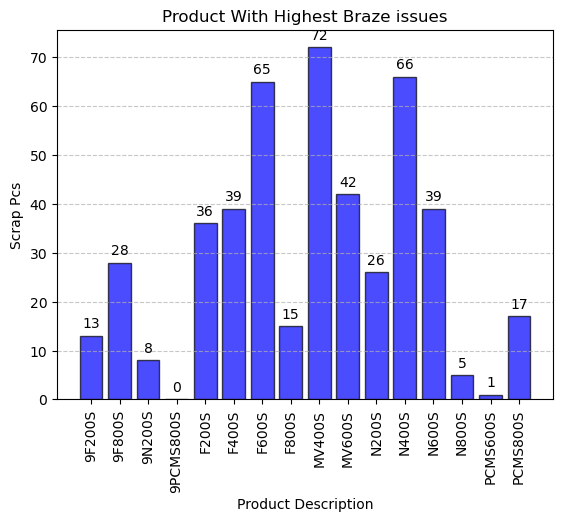

In [87]:

# Create the bar chart. 
plt.bar(highest_quality_issue['part_description'], highest_quality_issue['no_scrap_pcs'], color='blue', alpha=0.7, edgecolor='black')

#  Adding titles and labels. 
plt.title('Product With Highest Braze issues')
plt.xlabel('Product Description')
plt.ylabel('Scrap Pcs')

#  Adding grid lines and rotating xaxis labels by 45 degrees. 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=90)

# Adding Adding value annotations on top of bars. 
for i,  value in enumerate(highest_quality_issue['no_scrap_pcs']):
    plt.text(i, value + 1, str(value), ha='center', va='bottom')

### Most successful brazed product
<p> From the above chart , the 9pcms800s is the most successful Brazed part with the least amount of scrap, while the MV400s has the least successful brazed product.  </p>.


### A pie Chart to show the most brazed Products.

In [33]:
most_brazed_product = steelbrazerdata_df.groupby('part_description')['brazed_pcs'].sum().reset_index()

In [34]:
print (most_brazed_product)

   part_description  brazed_pcs
0            9F200S         662
1            9F800S        3520
2            9N200S         312
3         9PCMS800S         180
4             F200S        1359
5             F400S        4041
6             F600S        3445
7             F800S        3986
8            MV400S         684
9            MV600S        1918
10            N200S         734
11            N400S        2324
12            N600S        3201
13            N800S        3375
14         PCMS600S          59
15         PCMS800S         723


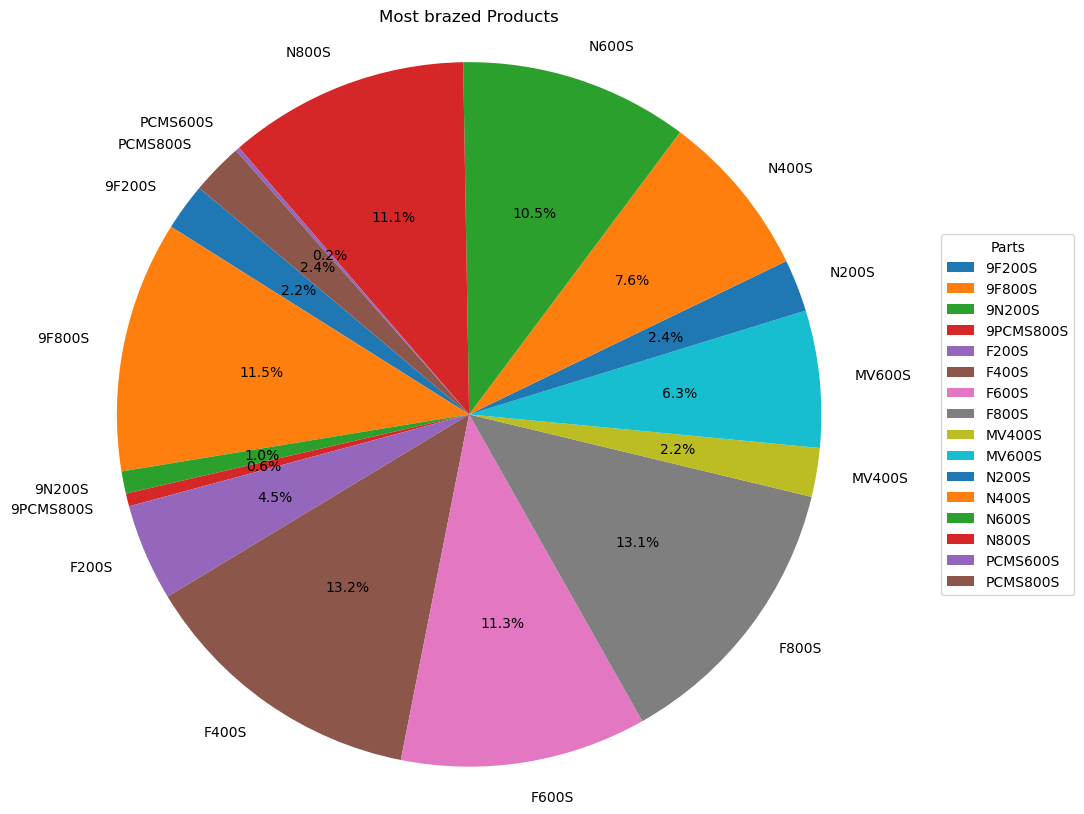

In [48]:
# Create the pie chart

plt.figure(figsize=(10, 10))  # Specified size of the figure

plt.pie(most_brazed_product['brazed_pcs'], labels=most_brazed_product['part_description'], autopct='%1.1f%%', shadow=False, startangle=140)

# Add a title
plt.title('Most brazed Products')

# Add legend
plt.legend(labels=most_brazed_product['part_description'], title="Parts", loc="center left", fontsize="medium", bbox_to_anchor=(1.1, 0.5))

# Display the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### Most brazed product.
<p> From the above pie chart the f400s with a percentage of 13.2% has the most brazed part.
while, the pcms600s is the least brazed part</p>


## Correlate external constraint like atmospheric temperature vs no of scrap part.

In [65]:
daily_Scrap = steelbrazerdata_df.groupby('brazed_date')['no_scrap_pcs'].sum().reset_index()

In [51]:
print(daily_Scrap)

   brazed_date  no_scrap_pcs
0   2024-01-02            12
1   2024-02-02            49
2   2024-04-01             8
3   2024-05-01             1
4   2024-05-02            25
5   2024-06-02             4
6   2024-07-02            30
7   2024-08-01             1
8   2024-08-02            32
9   2024-09-01             7
10  2024-09-02             2
11  2024-10-01             8
12  2024-10-02            37
13  2024-11-01            15
14  2024-11-02             1
15  2024-12-01            26
16  2024-12-02             2
17  2024-15-01             1
18  2024-16-01            43
19  2024-17-01             2
20  2024-18-01            36
21  2024-19-01            13
22  2024-22-01             4
23  2024-23-01             9
24  2024-24-01             6
25  2024-25-01            18
26  2024-26-01            34
27  2024-29-01            12
28  2024-30-01            15
29  2024-31-01            19


In [55]:
daily_temp =  tempsheet_df.groupby('brazed_date')['daily_temp'].mean().reset_index()
print(daily_temp)



   brazed_date  daily_temp
0   2024-01-02        52.0
1   2024-02-02        39.0
2   2024-05-02        36.0
3   2024-06-02        45.0
4   2024-07-02        53.0
5   2024-08-02        63.0
6   2024-09-02        65.0
7   2024-10-02        55.0
8   2024-11-02        38.0
9   2024-12-01        46.0
10  2024-12-02        41.2
11  2024-15-01        14.0
12  2024-16-01        14.0
13  2024-17-01        22.0
14  2024-18-01        26.0
15  2024-19-01        25.0
16  2024-22-01        38.0
17  2024-23-01        39.0
18  2024-24-01        50.0
19  2024-25-01        49.0
20  2024-26-01        47.0
21  2024-29-01        34.0
22  2024-30-01        39.0
23  2024-31-01        39.0


#### <p> Using a merge method, I was able to merge two dataframes. this enabled me to calculate the correlation between an external condition like the daily temperature and the metric for quality issues (no of scrap parts). </P> 

In [56]:
Temp_merge = pd.merge(daily_Scrap, daily_temp, on='brazed_date', how='inner')
print(Temp_merge)


   brazed_date  no_scrap_pcs  daily_temp
0   2024-01-02            12        52.0
1   2024-02-02            49        39.0
2   2024-05-02            25        36.0
3   2024-06-02             4        45.0
4   2024-07-02            30        53.0
5   2024-08-02            32        63.0
6   2024-09-02             2        65.0
7   2024-10-02            37        55.0
8   2024-11-02             1        38.0
9   2024-12-01            26        46.0
10  2024-12-02             2        41.2
11  2024-15-01             1        14.0
12  2024-16-01            43        14.0
13  2024-17-01             2        22.0
14  2024-18-01            36        26.0
15  2024-19-01            13        25.0
16  2024-22-01             4        38.0
17  2024-23-01             9        39.0
18  2024-24-01             6        50.0
19  2024-25-01            18        49.0
20  2024-26-01            34        47.0
21  2024-29-01            12        34.0
22  2024-30-01            15        39.0
23  2024-31-01  

In [57]:
correlation = Temp_merge['no_scrap_pcs'].corr(Temp_merge['daily_temp'])
print(f"Correlation between Number of scrap parts and Daily temperature: {correlation}")

Correlation between Number of scrap parts and Daily temperature: 0.04259344423016711


<p> The results shows a Very Weak Positive Correlation: The value is very close to 0, indicating a very weak positive linear relationship between the two variables. this means that the daily temeperature do not affect the the productivity of the steel brazer <P/>

## Comparing operators production

In [59]:
operators_products = steelbrazerdata_df.groupby('clock_id')['brazed_pcs'].sum().reset_index()
print(operators_products)

   clock_id  brazed_pcs
0    600783        7419
1    600784       11038
2    999013       12066


In [61]:
clock_merge = pd.merge(operators_products, employeesheet_df, on='clock_id', how='inner')
print(clock_merge)

   clock_id  brazed_pcs first_name last_name gender department created_date  \
0    600783        7419    Nichole      Palm      F    BRAZING   2024-01-06   
1    600784       11038      Louis    Parker      M    BRAZING   2024-01-06   
2    999013       12066       John      Zone      M    BRAZING   2024-01-06   

  update_date  
0  2024-06-04  
1  2024-06-04  
2  2024-06-04  


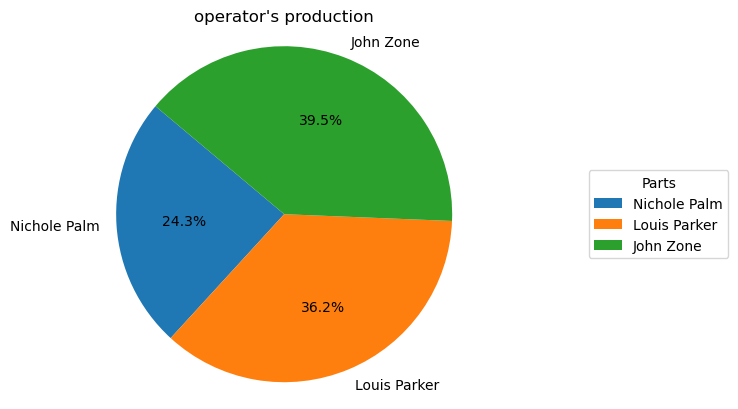

In [85]:
labels = clock_merge['first_name'] + " " + clock_merge['last_name']
plt.pie(clock_merge['brazed_pcs'], labels=labels , autopct='%1.1f%%', shadow=False, startangle=140)

# Add a title
plt.title("operator's production")

# Add legend
plt.legend(labels=labels, title="Parts", loc="center left", fontsize="medium", bbox_to_anchor=(1.1, 0.5))

# Display the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### From, the above Chart , John zone has the highest production. this chart did not factor daily hours of operator, therefore productivity of operator is not included.  